In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("3-Complete Linear Regression\Practicals\economic_index.csv")


In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(["Unnamed: 0","year","month"], axis=1,inplace=True)

In [7]:
import seaborn as sns

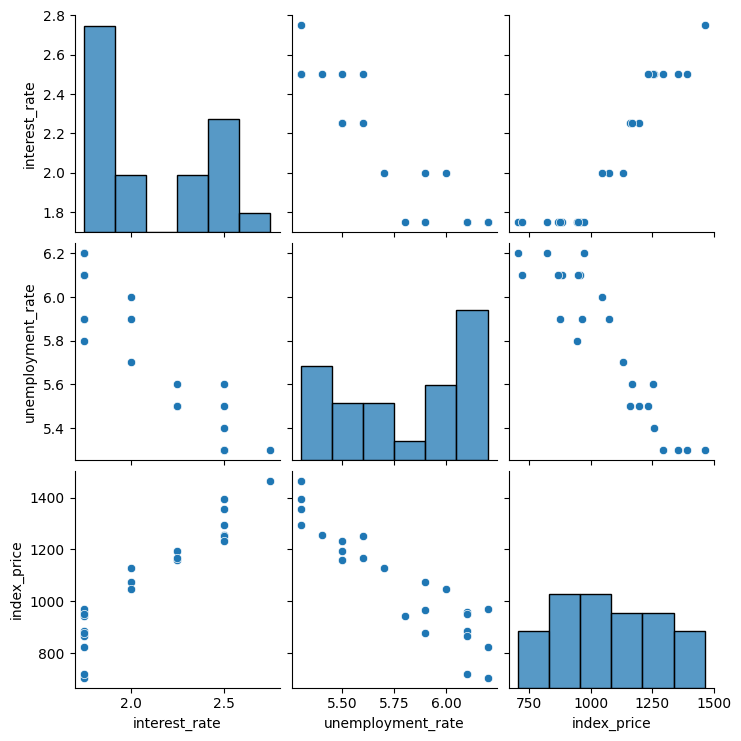

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
from sklearn.model_selection import cross_val_score
validarton = cross_val_score(regression ,X_train,y_train,scoring='neg_mean_squared_error',
                             cv=3)

In [38]:
np.mean(validarton)

np.float64(-5914.828180162386)

In [39]:
y_pred = regression.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


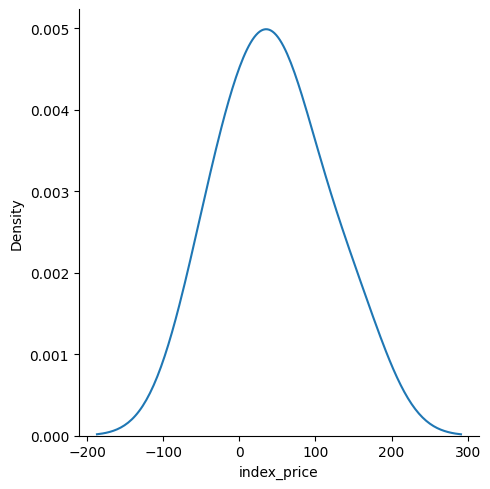

In [44]:
residuals = y_test-y_pred
sns.displot(residuals,kind='kde')